# Evaluación Final


In [2]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
import scipy.stats as stats
from scipy.stats import kstest, mannwhitneyu 


## Fase 1: Exploración y Limpieza
1. Exploración Inicial:

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df1 = pd.read_csv("Customer_Flight_Activity.csv")
df2 = pd.read_csv("Customer_Loyalty_History.csv")

In [5]:
print("Echemos un vistazo a las columnas del dataframe Customer_Flight_Activity:)")
df1.head(5)

Echemos un vistazo a las columnas del dataframe Customer_Flight_Activity:)


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [7]:
print("Echemos un vistazo a las columnas del dataframe Customer_Loyalty_History:)")
df2.head(5)

Echemos un vistazo a las columnas del dataframe Customer_Loyalty_History:)


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [9]:
#Vamos a mirar las columnas que parecen más relevantes
def exploracion_dataframe(dataframe, columna_control):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    print(f"El dataframe tiene la siguiente estructura {dataframe.shape}")
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    print(f"La columna {columna_control} tiene las siguientes valore únicos (head()):")
    display(pd.DataFrame(dataframe[columna_control].value_counts()))#.head())    
    print(f"En total tenemos: {len(dataframe[columna_control].value_counts())} valores únicos\n")
    
    print(f"Los valores únicos son: {dataframe[columna_control].unique()}\n")
    print("\n ..................... \n")
    display(dataframe.describe().T)

In [10]:
exploracion_dataframe(df1,"Loyalty Number")

El dataframe tiene la siguiente estructura (405624, 10)
Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64


La columna Loyalty Number tiene las siguientes valore únicos (head()):


,count
Loyalty Number,
678205,72
989528,48
373638,48
684889,48
684881,48
...,...
428526,24
428536,24
428565,24


En total tenemos: 16737 valores únicos

Los valores únicos son: [100018 100102 100140 ... 999731 999788 999891]


 ..................... 



,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


Vamos a eliminar los duplicados

In [11]:
df1[df1.duplicated()==True]

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
42,101902,2017,1,0,0,0,0,0.0,0,0
227,112142,2017,1,0,0,0,0,0.0,0,0
478,126100,2017,1,0,0,0,0,0.0,0,0
567,130331,2017,1,0,0,0,0,0.0,0,0
660,135421,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
404668,949628,2018,12,0,0,0,0,0.0,0,0
404884,960050,2018,12,0,0,0,0,0.0,0,0
405111,971370,2018,12,0,0,0,0,0.0,0,0
405410,988392,2018,12,0,0,0,0,0.0,0,0


In [12]:
df1.drop_duplicates(inplace=True)

In [13]:
df1[df1.duplicated()==True]


,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed


In [14]:
#Ordenamos y compronbamos que efectivamente hay valores repetidos en "Loyalty Number".
df1.sort_values(by=["Loyalty Number", "Year", "Month"]).head(24) #Miramos el pasajero 100018 

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
16901,100018,2017,2,2,2,4,1320,132.0,0,0
213311,100018,2017,3,14,3,17,2533,253.0,438,36
50703,100018,2017,4,4,0,4,924,92.0,0,0
67604,100018,2017,5,0,0,0,0,0.0,0,0
84505,100018,2017,6,4,1,5,4330,433.0,0,0
101406,100018,2017,7,10,0,10,3870,387.0,0,0
142774,100018,2017,8,10,5,15,4200,420.0,690,56
135208,100018,2017,9,9,4,13,1651,165.0,0,0
152109,100018,2017,10,6,0,6,1032,103.0,0,0


In [15]:
exploracion_dataframe(df2,"Loyalty Number")

El dataframe tiene la siguiente estructura (16737, 16)
Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


La columna Loyalty Number tiene las siguientes valore únicos (head()):


,count
Loyalty Number,
480934,1
208485,1
455896,1
469781,1
533488,1
...,...
922188,1
780529,1
721438,1


En total tenemos: 16737 valores únicos

Los valores únicos son: [480934 549612 429460 ... 776187 906428 652627]


 ..................... 



,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Unimos las tablas con un left join para mantener los datos de todos los que son y han sido clientes alguna vez. Eliminaremos los datos duplicados o innecesarios en el tratamiento posterior.

In [16]:
df = df2.merge(df1, how='left', on="Loyalty Number")
df.head(10)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
5,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,5,13,4,17,3757,375.0,0,0
6,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,6,12,0,12,1320,132.0,0,0
7,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,7,8,0,8,1448,144.0,0,0
8,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,8,14,6,20,2180,218.0,0,0
9,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,9,2,2,4,1200,120.0,0,0


In [17]:
exploracion_dataframe(df,"Loyalty Number")

El dataframe tiene la siguiente estructura (403760, 25)
Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


La columna Loyalty Number tiene las siguientes valore únicos (head()):


,count
Loyalty Number,
890702,48
617489,48
974875,48
736504,48
713132,47
...,...
176599,24
550058,24
577872,24


En total tenemos: 16737 valores únicos

Los valores únicos son: [480934 549612 429460 ... 776187 906428 652627]


 ..................... 



,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


## Fase 1: Exploración y Limpieza
2. Limpieza de Datos:

In [18]:
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38


In [19]:
exploracion_dataframe(df,"Cancellation Month")

El dataframe tiene la siguiente estructura (403760, 25)


Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.326927
Cancellation Year,87.703091
Cancellation Month,87.703091



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object


La columna Cancellation Month tiene las siguientes valore únicos (head()):


,count
Cancellation Month,
12.0,5112
11.0,5095
8.0,4992
7.0,4480
10.0,4322
9.0,4224
6.0,3960
1.0,3727
3.0,3579


En total tenemos: 12 valores únicos

Los valores únicos son: [nan  1. 12.  4.  2.  7. 11.  5.  6. 10.  8.  9.  3.]


 ..................... 



,count,mean,std,min,25%,50%,75%,max
Loyalty Number,403760.0,549875.383713,258961.514684,100018.00,326699.00,550598.00,772152.00,999986.00
Salary,301500.0,79258.576285,34983.929798,-58486.00,59262.00,73479.00,88606.00,407228.00
CLV,403760.0,7990.864857,6863.317160,1898.01,3981.78,5776.34,8937.12,83325.38
Enrollment Year,403760.0,2015.250716,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,403760.0,6.667555,3.398829,1.00,4.00,7.00,10.00,12.00
Cancellation Year,49650.0,2016.504350,1.380482,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,49650.0,6.962095,3.454362,1.00,4.00,7.00,10.00,12.00
Year,403760.0,2017.500352,0.500000,2017.00,2017.00,2018.00,2018.00,2018.00
Month,403760.0,6.501335,3.451982,1.00,4.00,7.00,10.00,12.00
Flights Booked,403760.0,4.134050,5.230064,0.00,0.00,1.00,8.00,21.00


In [20]:
df.sort_values(by=["Cancellation Year", "Cancellation Month"]).head(25) #Miramos el pasajero  

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
76177,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,1,0,0,0,0,0.0,0,0
76178,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,2,0,0,0,0,0.0,0,0
76179,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,3,0,0,0,0,0.0,0,0
76180,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,4,0,0,0,0,0.0,0,0
76181,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,5,0,0,0,0,0.0,0,0
76182,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,6,0,0,0,0,0.0,0,0
76183,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,7,0,0,0,0,0.0,0,0
76184,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,8,0,0,0,0,0.0,0,0
76185,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,9,0,0,0,0,0.0,0,0
76186,488724,Canada,Ontario,Toronto,M2Z 4K1,Male,Bachelor,58612.0,Married,Aurora,10629.22,Standard,2013,1,2013.0,1.0,2017,10,0,0,0,0,0.0,0,0


Vemos que seguimos teniendo datos que están repetidos, como es este cliente 488724, que canceló en el 2013 y siguen tomandose datos sobre él. Vamos a eliminar los datos posteriores a la fecha de su cancelación

In [21]:
#Estos son los años por los que se mueven nuestros datos
df["Year"].sort_values()

0         2017
166571    2017
166572    2017
166573    2017
166574    2017
          ... 
179363    2018
179364    2018
179365    2018
179368    2018
403759    2018
Name: Year, Length: 403760, dtype: int64

In [22]:
# Filtrar las filas que cumplen con las condiciones
rows_to_drop = df[
    (df["Cancellation Year"] < df["Year"]) |
    ((df["Cancellation Year"] == df["Year"]) & (df["Cancellation Month"] < df["Month"]))
].index

In [23]:
rows_to_drop

Index([    60,     61,     62,     63,     64,     65,     66,     67,     69,
           70,
       ...
       403750, 403751, 403752, 403753, 403754, 403755, 403756, 403757, 403758,
       403759],
      dtype='int64', length=33988)

In [24]:
df.loc[60:70,:]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
60,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,2,0,0,0,0,0.0,0,0
61,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,3,0,0,0,0,0.0,0,0
62,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,4,0,0,0,0,0.0,0,0
63,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,5,0,0,0,0,0.0,0,0
64,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,6,0,0,0,0,0.0,0,0
65,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,7,0,0,0,0,0.0,0,0
66,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,8,0,0,0,0,0.0,0,0
67,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,9,0,0,0,0,0.0,0,0
68,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2017,2,4,3,7,777,77.0,374,30
69,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2018,10,0,0,0,0,0.0,0,0


In [25]:
# Eliminar las filas filtradas
df.drop(rows_to_drop, axis=0, inplace=True)

In [26]:
df.loc[60:70,:]

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
68,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2017,2,4,3,7,777,77.0,374,30


In [27]:
df.sort_values(by=["Cancellation Year"]).head(28)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
403203,969719,Canada,British Columbia,West Vancouver,V6V 8Z3,Male,Bachelor,88356.0,Married,Star,40235.97,Standard,2016,5,2017.0,1.0,2017,1,3,3,6,1038,103.0,536,43
304900,575015,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Single,Star,4162.18,Standard,2016,11,2017.0,7.0,2017,6,2,0,2,1234,123.0,0,0
304901,575015,Canada,New Brunswick,Fredericton,E3B 2H2,Male,College,NaN,Single,Star,4162.18,Standard,2016,11,2017.0,7.0,2017,7,7,2,9,3285,328.0,0,0
115741,293663,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,85263.0,Single,Nova,3122.98,Standard,2014,4,2017.0,5.0,2017,5,4,4,8,3576,357.0,0,0
115740,293663,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,85263.0,Single,Nova,3122.98,Standard,2014,4,2017.0,5.0,2017,4,10,0,10,2090,209.0,0,0
115739,293663,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,85263.0,Single,Nova,3122.98,Standard,2014,4,2017.0,5.0,2017,3,6,6,12,3648,364.0,0,0
115738,293663,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,85263.0,Single,Nova,3122.98,Standard,2014,4,2017.0,5.0,2017,2,1,0,1,810,81.0,0,0
115737,293663,Canada,New Brunswick,Moncton,E1A 2A7,Male,Bachelor,85263.0,Single,Nova,3122.98,Standard,2014,4,2017.0,5.0,2017,1,0,0,0,0,0.0,0,0
305423,481902,Canada,Newfoundland,St. John's,A1C 6H9,Male,College,NaN,Single,Star,4191.06,Standard,2016,11,2017.0,7.0,2017,1,0,0,0,0,0.0,0,0
305424,481902,Canada,Newfoundland,St. John's,A1C 6H9,Male,College,NaN,Single,Star,4191.06,Standard,2016,11,2017.0,7.0,2017,2,4,0,4,1120,112.0,0,0


In [28]:
#Una vez borrados los datos de los pasajeros que ya no son clientes nuestro dataframe tiene la siguiente forma:
df.shape

(369772, 25)

Dos columnas que tienen nulos son la de *Cancellation Year* y *Cancellation Month*, suponemos que nulo significa que sigue dado de alta, ya que la recogida de datos parece minuciosa y no faltan casi. Sustituiremos sus valores nulos por "Cliente activo", ya que trataremos estas columnas como categóricas.

La otra columna que tiene nulos es la de Salary que puede ser que haya gente que no la haya querido responder pero son pocos los valores nulos, así que sí los reemplazaremos.

In [29]:
#Vamos a cambiar los nulos:
(df.isnull().sum() / df.shape[0]) * 100

Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.359681
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              95.764417
Cancellation Month             95.764417
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Poin

In [30]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df.isnull().sum() / df.shape[0]) * 100, columns = ["%_nulos"])
# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos = df_nulos[df_nulos["%_nulos"] > 0]
df_nulos

,%_nulos
Salary,25.359681
Cancellation Year,95.764417
Cancellation Month,95.764417


In [31]:
# utilizando el método fillna reemplazamos los valores nulos por la moda calculada en el paso anterior. 
lista_columnas = ["Cancellation Year","Cancellation Month"]
for column in lista_columnas:
    df[column] = df[column].fillna("Cliente_activo")

Vamos a cambiar todas las columnas con fechas para tratarlas como categóricas ya que no haremos medias, medianas, etc con ellas

In [32]:
lista_columnas_a_object = ["Enrollment Year","Enrollment Month","Cancellation Year","Cancellation Month","Year","Month"]
for col in lista_columnas_a_object:
    df[col] = df[col].astype(str)

In [33]:
df.dtypes

Loyalty Number                   int64
Country                         object
Province                        object
City                            object
Postal Code                     object
Gender                          object
Education                       object
Salary                         float64
Marital Status                  object
Loyalty Card                    object
CLV                            float64
Enrollment Type                 object
Enrollment Year                 object
Enrollment Month                object
Cancellation Year               object
Cancellation Month              object
Year                            object
Month                           object
Flights Booked                   int64
Flights with Companions          int64
Total Flights                    int64
Distance                         int64
Points Accumulated             float64
Points Redeemed                  int64
Dollar Cost Points Redeemed      int64
dtype: object

In [34]:
(df.isnull().sum() / df.shape[0]) * 100

Loyalty Number                  0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.359681
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year               0.000000
Cancellation Month              0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Poin

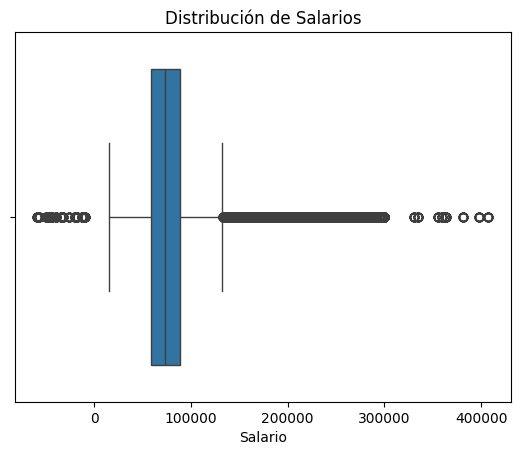

In [35]:
sns.boxplot(x = "Salary", data = df)
plt.title('Distribución de Salarios')
plt.xlabel("Salario");

Ahora la columna de Salary:
nuestros datos tienen bastantes valores atípicos, así que usaremos métodos de imputación, pero previamente vamos a cambiar a nulos los valores negativos.

In [37]:
def negativo_a_null(dato):
    if dato < 0:
        return np.nan
    else:
        return dato
    
df["Salary"] = df["Salary"].apply(negativo_a_null)
df["Salary"].describe().T

count    275523.000000
mean      79447.853932
std       34807.691039
min       15609.000000
25%       59332.000000
50%       73544.000000
75%       88612.000000
max      407228.000000
Name: Salary, dtype: float64

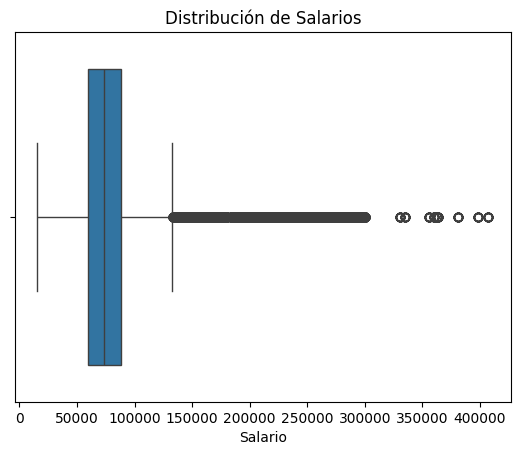

In [38]:
sns.boxplot(x = "Salary", data = df)
plt.title('Distribución de Salarios')
plt.xlabel("Salario");

Imputemos:

In [39]:
df_copia = df.copy()

## Iterative Imputer

In [40]:
# instanciamos la clase del IterativeImputer
imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["Salary"]])
imputer_iterative_imputado						

array([[83236.        ],
       [83236.        ],
       [83236.        ],
       ...,
       [79447.85393234],
       [79447.85393234],
       [79447.85393234]])

In [41]:
df_copia[["Salary_II"]] = imputer_iterative_imputado										

In [42]:
#Comprobamos si hemos sustituido todos los nulos
print(f"Después del 'Iterative' tenemos: \n{df_copia[['Salary_II']].isnull().sum()} nulos")										

Después del 'Iterative' tenemos: 
Salary_II    0
dtype: int64 nulos


## KNN Imputer

In [43]:
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors = 5)
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Salary"]])
imputer_knn_imputado

array([[83236.        ],
       [83236.        ],
       [83236.        ],
       ...,
       [79447.85393234],
       [79447.85393234],
       [79447.85393234]])

In [44]:
df_copia[["Salary_KNN"]] = imputer_knn_imputado

In [45]:
#Comprobamos si hemos sustituido todos los nulos
print(f"Después del 'KNN' tenemos: \n{df_copia[['Salary_KNN']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
Salary_KNN    0
dtype: int64 nulos


Comparamos con ambos métodos:

In [46]:
df_copia.describe()[["Salary", "Salary_II", "Salary_KNN"]]

,Salary,Salary_II,Salary_KNN
count,275523.000000,369772.000000,369772.000000
mean,79447.853932,79447.853932,79447.853932
std,34807.691039,30046.018663,30046.018663
min,15609.000000,15609.000000,15609.000000
25%,59332.000000,64001.000000,64001.000000
50%,73544.000000,79447.853932,79447.853932
75%,88612.000000,82936.000000,82936.000000
max,407228.000000,407228.000000,407228.000000


Los datos que obtenemos son iguales, así que nos podemos quedar con cualquiera de las dos columnas nuevas. Por ejemplo, la de IterativeImputer, y eliminamos el resto:

In [47]:
df_copia.drop(["Salary", "Salary_KNN"], axis = 1, inplace = True)

In [48]:
# ahora vamos a cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre de origen
nuevo_nombre = {"Salary_II": "Salary"}
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [49]:
df_copia["Salary"].value_counts()

Salary
79447.853932     94249
101933.000000      480
61809.000000       336
64001.000000       306
76159.000000       295
                 ...  
104201.000000        1
97597.000000         1
66695.000000         1
49446.000000         1
63506.000000         1
Name: count, Length: 5801, dtype: int64

-----------------------------------------------------------------------------------------------------------------------------------------------------------------
## Fase 2: Visualización
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

In [50]:
#Sobreescribimos los datos de la imputación en nuestro dataframe.
df = df_copia
df.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,Cliente_activo,Cliente_activo,2017,1,0,0,0,0,0.0,0,0,83236.0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,Cliente_activo,Cliente_activo,2017,2,3,0,3,2823,282.0,0,0,83236.0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,Cliente_activo,Cliente_activo,2017,3,0,0,0,0,0.0,0,0,83236.0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,Cliente_activo,Cliente_activo,2017,4,0,0,0,0,0.0,0,0,83236.0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,Married,Star,3839.14,Standard,2016,2,Cliente_activo,Cliente_activo,2018,10,6,2,8,3352,335.0,465,38,83236.0


In [51]:
# Agrupar por año y mes y sumar la cantidad de vuelos reservados
df_fecha = df.groupby(["Year", "Month"])["Flights Booked"].sum().reset_index()
meses = {"1": "enero",
        "2": "febrero",
        "3": "marzo",
        "4": "abril",
        "5": "mayo",
        "6": "junio",
        "7": "julio",
        "8": "agosto",
        "9": "septiembre",
        "10": "octubre",
        "11": "noviembre",
        "12": "diciembre"}
df_fecha["Month"] = df_fecha["Month"].replace(meses)
# Convertir la columna "Month" a tipo categórico con el orden especificado
df_fecha["Month"] = pd.Categorical(df_fecha["Month"], categories=meses.values(), ordered=True)
df_fecha_ordenada = df_fecha.sort_values(["Year","Month"])
df_fecha_ordenada


,Year,Month,Flights Booked
0,2017,enero,47766
4,2017,febrero,47691
5,2017,marzo,64271
6,2017,abril,55720
7,2017,mayo,65279
8,2017,junio,80493
9,2017,julio,89288
10,2017,agosto,78692
11,2017,septiembre,63304
1,2017,octubre,60351


In [52]:
# Establecer el estilo con cuadrícula
sns.set_style("whitegrid")

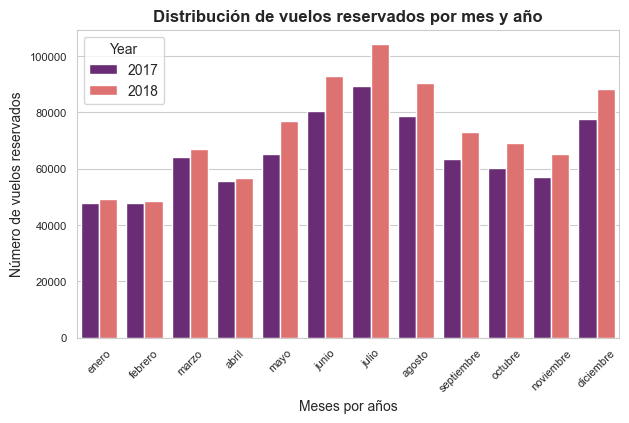

In [64]:
# Crear un gráfico de barras
plt.figure(figsize=(7, 4))
sns.barplot(x="Month", y="Flights Booked", hue="Year", data=df_fecha, palette="magma")
plt.title("Distribución de vuelos reservados por mes y año", fontweight='bold')
plt.xlabel("Meses por años")
plt.ylabel("Número de vuelos reservados")
# Girar los nombres de los meses 45 grados
plt.xticks(rotation=45, fontsize=8)
plt.yticks(fontsize=8)
plt.show();

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
- Vemos que las reservas de vuelos son mayores en 2018 que en 2017 
- Además apreciamos que en ambos años hay **crecimiento** en el número de reservas
    - en marzo 
    - en mayo y sigue creciendo hata julio donde alcanza su pico y disminuye en agosto y aun más en septiembre
    - en diciembre 
    Todos estos picos corresponden con vacaciones escolares: Semana Santa, Verano y Navidad.
- Apreciamos también que los meses donde se efectuan menos reservas son en enero y febrero seguidos de abril.

# Seguimos
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

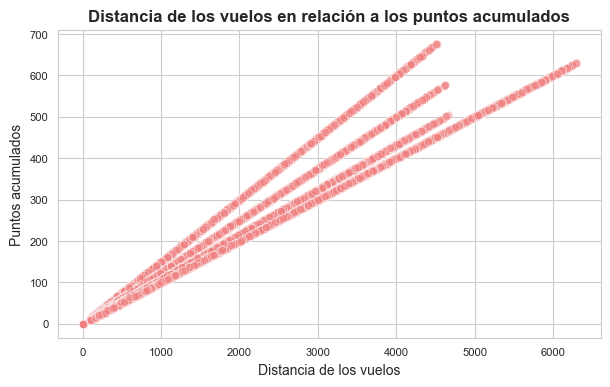

In [65]:
# Crear un scatterplot
plt.figure(figsize=(7, 4))
sns.scatterplot(x="Distance", y="Points Accumulated", data=df, color="lightcoral", alpha=0.5)
plt.title("Distancia de los vuelos en relación a los puntos acumulados", fontweight='bold')
plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.show()

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?
- Podemos ver una clara tendencia positiva entre ambas variables, según sube una sube la otra, a mayor distancia más puntos y al revés.

# Seguimos
3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [66]:
# Comprobamos y vemos que solo tenemos datos para Country = Canada, por lo que no tendremos que movernos por distintos paises
df.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'CLV',
       'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Salary'],
      dtype='object')

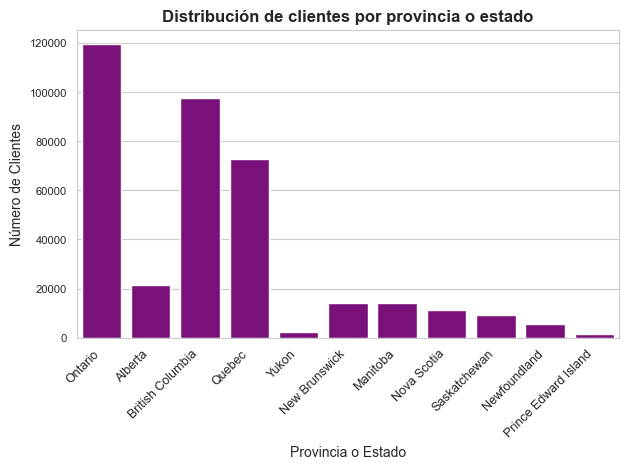

In [69]:
# Crear un countplot
plt.figure(figsize=(7, 4))
sns.countplot(x="Province",data=df, color="darkmagenta")
plt.title("Distribución de clientes por provincia o estado", fontweight='bold')
plt.xlabel("Provincia o Estado")
plt.ylabel("Número de Clientes")
plt.xticks(rotation=45, ha="right", fontsize=9)  # Girar los nombres de las provincias para mayor legibilidad
plt.yticks(fontsize=8)
plt.show();

3. ¿Cuál es la distribución de los clientes por provincia o estado?
- Vemos que la mayor parte de los clientes son de Ontario, British Columbia y Quebec. 
- Donde encontramos menor cantidad de clientes es en Yukon y Prince Edward Island

# Seguimos
4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [70]:
df["Education"].value_counts()

Education
Bachelor                231410
College                  93773
High School or Below     17207
Doctor                   16083
Master                   11299
Name: count, dtype: int64

In [71]:
#Ordenamos los niveles educativos
orden_educativo = ["High School or Below", "College", "Bachelor", "Master", "Doctor"]

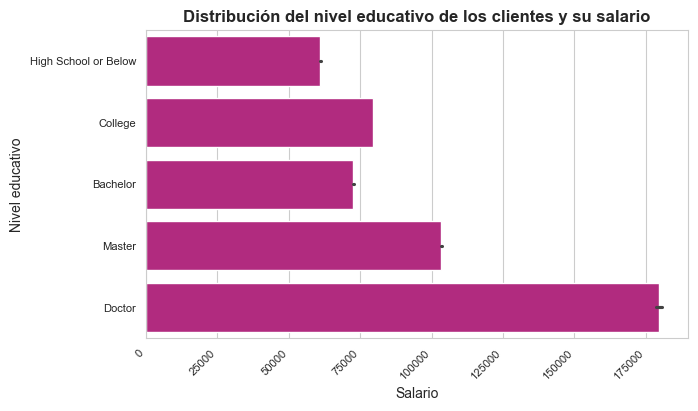

In [76]:
# Crear un grafico de barras
plt.figure(figsize=(7, 4))
sns.barplot(x="Salary", y = "Education" ,data=df, color="mediumvioletred", order=orden_educativo)
plt.title("Distribución del nivel educativo de los clientes y su salario", fontweight='bold')
plt.xlabel("Salario")
plt.ylabel("Nivel educativo")
plt.xticks(rotation=45, ha="right", fontsize=8)  
plt.yticks(fontsize=8)
plt.show();

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
- Vemos que los clientes con doctorados son claramente los clientes con mayor salario. 
- Los clientes con menor nivel de estudios son los que menos cobran, seguidos de cerca por aquellos que han realizado una licenciatura.
- Curiosamente cobran más los que han estudiado una diplomatura y menos los de licenciaturas.
- Aquellos con un master tienen un sueldo notoriamente superior a los licenciados.

Podemos concluir que en general a mayor cantidad de estudios mayor es el salario, salvo en el caso de las diplomaturas y licenciaturas, que resulta al revés.

# Seguimos
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [78]:
# Sacamos solo "Loyalty Card" con los tipos de tarjetas de fidelidad
df_pie = df["Loyalty Card"].value_counts()
print(df_pie.index)
print(df_pie.values)

Index(['Star', 'Nova', 'Aurora'], dtype='object', name='Loyalty Card')
[168780 125177  75815]


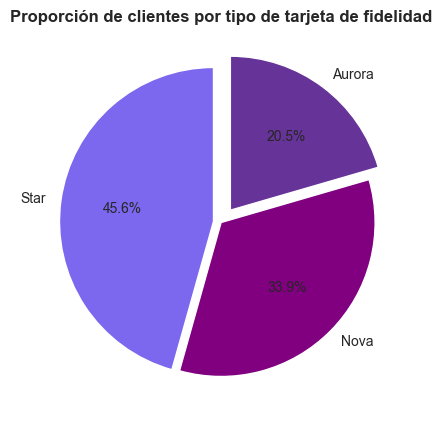

In [102]:
# Configuración de colores
colores = ['mediumslateblue', 'purple', 'rebeccapurple']
# Crear el gráfico de pastel
plt.figure(figsize=(5,5))
plt.pie(df_pie, labels=df_pie.index, autopct='%1.1f%%', startangle=90, colors=colores, explode=(0.05,0,0.1)) 
# Configuración adicional
plt.title("Proporción de clientes por tipo de tarjeta de fidelidad", fontweight='bold')
plt.show()

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
- Podemos observar que la mayoría, el 45,6%, de los clientes tienen la tarjeta de fidelidad Star
- En cambio la tarjeta Aurora que tiene menor cantidad de gente es la Aurora.

# Seguimos
6. ¿Cómo se distribuyen los clientes según su estado civil y género?

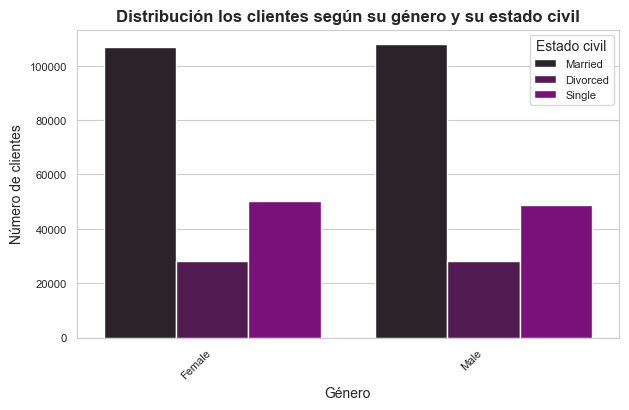

In [128]:
# Crear un grafico de barras
plt.figure(figsize=(7, 4))
sns.countplot(x="Gender", hue= "Marital Status" ,data=df, palette='dark:darkmagenta')
plt.title("Distribución los clientes según su género y su estado civil", fontweight='bold')
plt.xlabel("Género")
plt.ylabel("Número de clientes")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Estado civil', title_fontsize='10', fontsize='8')
plt.show();

6. ¿Cómo se distribuyen los clientes según su estado civil y género?
- Podemos ver que la gran mayoria de clientes, tanto en hombres como en mujeres es de casados, y los que menos viajan con nosotros son los divorciados.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------
## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
- Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
1. Preparación de Datos:

    Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
2. Análisis Descriptivo:

    Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.
3. Prueba Estadística:

    Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

H0 = No hay diferencia en el número de vuelos según  el nivel educativo de los clientes.

H1 = Sí hay diferencia.

In [103]:
df_eva = df[['Flights Booked', 'Education']]
df_eva.sample(13)


,Flights Booked,Education
80965,7,Bachelor
278718,15,Bachelor
372124,11,College
194481,9,Bachelor
130264,0,Bachelor
256263,11,Bachelor
187739,0,College
294669,1,Bachelor
387732,15,Bachelor
233594,0,Bachelor


In [104]:
df_eva["Education"].value_counts()

Education
Bachelor                231410
College                  93773
High School or Below     17207
Doctor                   16083
Master                   11299
Name: count, dtype: int64

Agrupamos por:
1. Educación básica: que van a ser aquellos que no han ido a la universidad que son solo High School or Below
2. Educación superior: serán el resto

In [105]:
df_edu = df_eva.copy()
df_edu['Grupos_Educacion'] = np.where(df_edu['Education'] == 'High School or Below', 'Ed_Basica', 'Ed_Superior')

In [112]:
df_edu.sample(3)

,Flights Booked,Education,Grupos_Educacion
182429,3,Bachelor,Ed_Superior
135260,0,Bachelor,Ed_Superior
171508,0,High School or Below,Ed_Basica


In [113]:
df_edu["Grupos_Educacion"].value_counts()

Grupos_Educacion
Ed_Superior    352565
Ed_Basica       17207
Name: count, dtype: int64

In [114]:
df_edu_basica = df_edu[df_edu["Grupos_Educacion"]=="Ed_Basica"]
df_edu_superior = df_edu[df_edu["Grupos_Educacion"]=="Ed_Superior"]

In [115]:
df_edu_basica.describe()

,Flights Booked
count,17207.000000
mean,4.590748
std,5.317109
min,0.000000
25%,0.000000
50%,2.000000
75%,9.000000
max,21.000000


In [116]:
df_edu_superior.describe()

,Flights Booked
count,352565.000000
mean,4.510292
std,5.305327
min,0.000000
25%,0.000000
50%,2.000000
75%,8.000000
max,21.000000


Segun estos datos iniciales vemos que las medias y desviación típica son similares, Q1, mediana, mínimos y máximos son iguales y Q3 es ligeramente superior en el caso de ed.básica.

· Comparamos visualmente

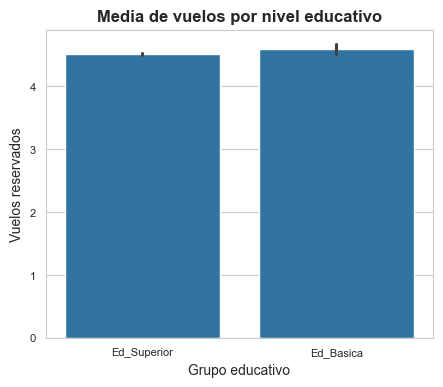

In [120]:
# Gráfico Comparativa de medias
plt.figure(figsize=(5, 4))
sns.barplot(x="Grupos_Educacion", y="Flights Booked", data=df_edu)
plt.title("Media de vuelos por nivel educativo", fontweight='bold')
plt.xlabel("Grupo educativo")
plt.ylabel("Vuelos reservados")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);


Vemos una media en el número de vuelos reservados mayor para la Educación básica.

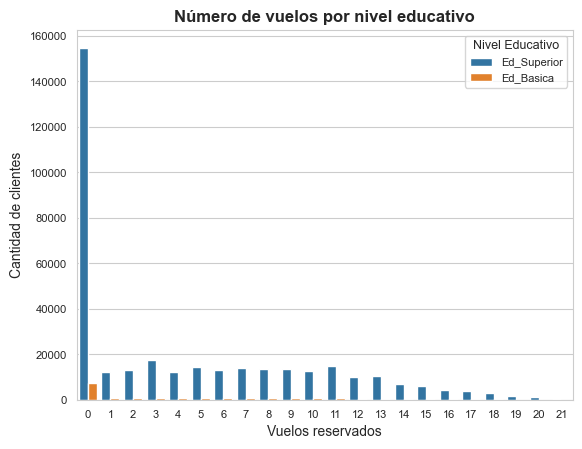

In [129]:
# Gráfico Comparativa de cantidad de vuelos reservados
sns.countplot(hue="Grupos_Educacion", x="Flights Booked", data=df_edu)
plt.title("Número de vuelos por nivel educativo", fontweight='bold')
plt.xlabel("Vuelos reservados")
plt.ylabel("Cantidad de clientes")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.legend(title='Nivel Educativo', title_fontsize='9', fontsize='8');

Parece haber mayor número de vuelos del grupo de educación superior pero al haber muchos más clientes con ese nivel educativo, no nos podemos fiar.

• Comprobamos normalidad

In [130]:
#A. NORMALIDAD con Kolmogrov

def normalidad(dataframe, columna):
    statistic, p_value = kstest(dataframe[columna], "norm")
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

normalidad(df_edu,"Flights Booked")

Para la columna Flights Booked los datos no siguen una distribución normal.


Como no se ajusta a una distribución normal nos podemos ahorrar comprobar la homogeneidad de la variaza e independencia de datos.

Realizaremos una prueba no paramétrica: Mann-Whitney.

In [131]:
#Calculamos el pvalor con MannWhitney
statistic, p_value = stats.mannwhitneyu(df_edu_basica["Flights Booked"], df_edu_superior["Flights Booked"])
if p_value < 0.05:
    print(f"El p_value: {p_value} es menor a 0.05. Hay diferencias significativas en las medianas.")
else:
    print(f"Las medianas son iguales.")
    

El p_value: 0.012992967702615689 es menor a 0.05. Hay diferencias significativas en las medianas.


## Los datos muestran que hay diferencias significativas en las medianas y rechazar la hipótesis nula. 
## Esto señala que el nivel de estudios afecta a la cantidad de vuelos que compra cada cliente según su nivel educativo.